In [2]:
import torch
from torchvision.utils import save_image
import torch.nn as nn
from collections import OrderedDict

# Device configuration
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define Generator and Discriminator classes (Make sure these are EXACTLY as defined in your training notebook)
class Generator(nn.Module):
    def __init__(self, latent_size, image_size, hidden_size):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            nn.ConvTranspose2d(latent_size, hidden_size * 8, kernel_size=4, stride=1, padding=0, bias=False),
            nn.BatchNorm2d(hidden_size * 8),
            nn.ReLU(True),
            nn.ConvTranspose2d(hidden_size * 8, hidden_size * 4, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(hidden_size * 4),
            nn.ReLU(True),
            nn.ConvTranspose2d(hidden_size * 4, hidden_size * 2, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(hidden_size * 2),
            nn.ReLU(True),
            nn.ConvTranspose2d(hidden_size * 2, hidden_size, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(hidden_size),
            nn.ReLU(True),
            nn.ConvTranspose2d(hidden_size, 3, kernel_size=4, stride=2, padding=1, bias=False),
            nn.Tanh()
        )

    def forward(self, x):
        return self.net(x)

class Discriminator(nn.Module):
    def __init__(self, image_size, hidden_size):
        super(Discriminator, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(3, hidden_size, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(hidden_size),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(hidden_size, hidden_size * 2, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(hidden_size * 2),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(hidden_size * 2, hidden_size * 4, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(hidden_size * 4),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(hidden_size * 4, hidden_size * 8, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(hidden_size * 8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(hidden_size * 8, 1, kernel_size=4, stride=1, padding=0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

# Set parameters (These should match your training parameters)
latent_size = 128
image_size = 64
hidden_size = 64

# Initialize models
generator = Generator(latent_size, image_size, hidden_size).to(device)
discriminator = Discriminator(image_size, hidden_size).to(device)

# Load the FULL models
generator_path = '/kaggle/input/g01234/generator_full_final.pth'
discriminator_path = '/kaggle/input/d01234/discriminator_full_final.pth'

# Load the FULL models, and load the state_dict
try:
    generator = torch.load(generator_path, map_location=device)
    #state_dict_G = torch.load(generator_path, map_location=device)
    #new_state_dict_G = OrderedDict()
    #for k, v in state_dict_G.items():
    #    new_state_dict_G['net.' + k] = v
    #generator.load_state_dict(new_state_dict_G)
    print("Loaded generator successfully")
except Exception as e:
    print(f"Error loading generator: {e}")
    raise  # Re-raise the exception to stop execution if loading fails

try:
    #discriminator.load_state_dict(torch.load(discriminator_path, map_location=device))
    discriminator = torch.load(discriminator_path, map_location=device)
    print("Loaded discriminator successfully")
except Exception as e:
    print(f"Error loading discriminator: {e}")
    raise  # Re-raise the exception to stop execution if loading fails
# Set generator to evaluation mode
generator.eval()

# Function to generate images
# Function to generate images
def generate_images(generator_model, num_images=16, latent_size=128):
    generator_model.eval()  # Ensure generator is in eval mode

    with torch.no_grad():
        # Generate fixed sample images
        fixed_noise = torch.randn(num_images, latent_size, 1, 1).to(device)
        
        # Try to be adaptive to different model structures
        try:
            # First try directly calling the model
            fake_images = generator_model(fixed_noise)
        except AttributeError:
            # If that fails, try to inspect the model structure
            print("Model structure differs from expected. Attempting to adapt...")
            # Print model to understand its structure
            print(generator_model)
            
            # If you know the model has a different structure, specify it here
            # For example, if the forward function is directly implemented:
            if hasattr(generator_model, 'forward'):
                fake_images = generator_model.forward(fixed_noise)
            else:
                raise Exception("Cannot determine how to generate images with this model structure")

        # Save generated images
        try:
            save_image(fake_images.detach().cpu(), '/kaggle/working/fake_samples.png',
                      normalize=True, nrow=4)
            print("Saved sample images to /kaggle/working/fake_samples.png")
        except Exception as e:
            print(f"Could not save sample images: {e}")

Using device: cuda:0
Loaded generator successfully
Loaded discriminator successfully


<ipython-input-2-fbc3fb3796b8>:72: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  generator = torch.load(generator_path, map_location=device)
<ipython-input-2-fbc3fb3796b8>:8

In [3]:
# First run the model loading code
import torch
from torchvision.utils import save_image
import torch.nn as nn

# Device configuration
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define your model classes...
# [Your model class definitions here]

# Load the models
generator_path = '/kaggle/input/g01234/generator_full_final.pth'
discriminator_path = '/kaggle/input/d01234/discriminator_full_final.pth'

generator = torch.load(generator_path, map_location=device)
discriminator = torch.load(discriminator_path, map_location=device)

# Then check the model structure
print("Generator model structure:")
print(generator)
print("\nGenerator model attributes:")
for attr in dir(generator):
    if not attr.startswith('_'):  # Skip private attributes
        print(attr)

# Finally define and run a compatible generate_images function
def generate_images(generator_model, num_images=16, latent_size=128):
    generator_model.eval()
    with torch.no_grad():
        fixed_noise = torch.randn(num_images, latent_size, 1, 1).to(device)
        
        # Try different ways to run the model based on what's available
        fake_images = None
        try:
            fake_images = generator_model(fixed_noise)
        except Exception as e1:
            print(f"Direct call failed: {e1}")
            try:
                fake_images = generator_model.forward(fixed_noise)
            except Exception as e2:
                print(f"Forward call failed: {e2}")
                
        if fake_images is not None:
            save_image(fake_images.detach().cpu(), '/kaggle/working/fake_samples.png',
                     normalize=True, nrow=4)
            print("Saved sample images to /kaggle/working/fake_samples.png")
        else:
            print("Failed to generate images")
            
# Run the function
generate_images(generator)

Using device: cuda:0
Generator model structure:
Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), pad

<ipython-input-3-0b750b2ca7d8>:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  generator = torch.load(generator_path, map_location=device)
<ipython-input-3-0b750b2ca7d8>:1

In [4]:
import torch
from torchvision.utils import save_image

# Device configuration
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load the models
generator_path = '/kaggle/input/g01234/generator_full_final.pth'
generator = torch.load(generator_path, map_location=device)

# Fix the model by adding a compatible forward method
if hasattr(generator, 'main') and not hasattr(generator, 'net'):
    # Add net attribute that points to main
    generator.net = generator.main
    
    # Or alternatively, replace the forward method entirely
    original_forward = generator.forward
    def new_forward(self, x):
        return self.main(x)
    
    # Bind the new method to the generator instance
    import types
    generator.forward = types.MethodType(new_forward, generator)

# Function to generate images
def generate_images(generator_model, num_images=16, latent_size=100):
    generator_model.eval()
    
    with torch.no_grad():
        # Generate fixed sample images
        fixed_noise = torch.randn(num_images, latent_size, 1, 1).to(device)
        fake_images = generator_model(fixed_noise)
        
        # Save generated images
        save_image(fake_images.detach().cpu(), '/kaggle/working/fake_samples.png',
                   normalize=True, nrow=4)
        print("Saved sample images to /kaggle/working/fake_samples.png")

# Generate sample images
generate_images(generator)

Using device: cuda:0


<ipython-input-4-9f30d68ab7bf>:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  generator = torch.load(generator_path, map_location=device)


Saved sample images to /kaggle/working/fake_samples.png


In [5]:
import torch
from torchvision.utils import save_image

# Device configuration
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load the generator model
generator_path = '/kaggle/input/g01234/generator_full_final.pth'
generator = torch.load(generator_path, map_location=device)

# Fix the model by adding 'net' attribute that points to 'main'
if hasattr(generator, 'main') and not hasattr(generator, 'net'):
    generator.net = generator.main

# Generate images
def generate_images(generator_model, num_images=16, latent_size=100):
    generator_model.eval()  # Set to evaluation mode
    
    with torch.no_grad():
        # Create random noise input
        noise = torch.randn(num_images, latent_size, 1, 1).to(device)
        
        # Generate fake images
        fake_images = generator_model.net(noise)  # Use .net directly to bypass forward method
        
        # Save the images
        save_image(fake_images.detach().cpu(), '/kaggle/working/generated_images.png', 
                  normalize=True, nrow=4)
        print("Successfully generated and saved images to /kaggle/working/generated_images.png")

# Run the image generation
generate_images(generator)

Using device: cuda:0
Successfully generated and saved images to /kaggle/working/generated_images.png


<ipython-input-5-9210f963f331>:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  generator = torch.load(generator_path, map_location=device)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


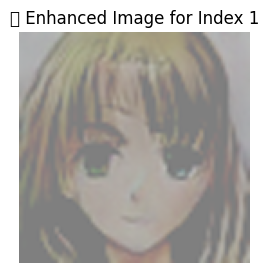

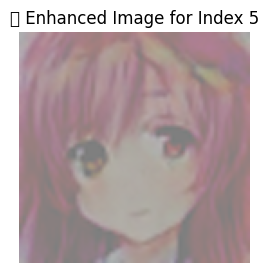

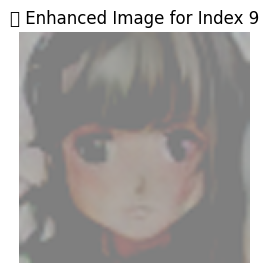

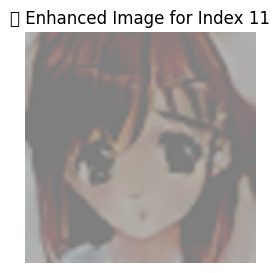

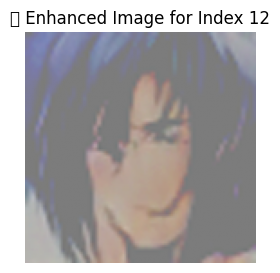

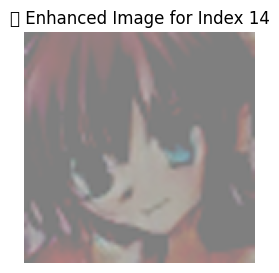

In [6]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torchvision.utils import make_grid
import torch.nn.functional as F
from PIL import Image, ImageEnhance

# Generator settings
latent_size = 100
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator.eval()

# Function to denormalize
def denorm(img_tensor):
    return img_tensor * 0.3 + 0.5

# Function to upscale image using bicubic interpolation
def upscale_image_bicubic(image_tensor, scale_factor=2):
    return F.interpolate(image_tensor, scale_factor=scale_factor, mode='bicubic', align_corners=False)

# Function to enhance image vibrancy
def enhance_vibrancy(image):
    # Convert to PIL image for easier manipulation
    pil_img = Image.fromarray((image * 255).astype(np.uint8))

    # Increase color saturation (can be adjusted)
    enhancer = ImageEnhance.Color(pil_img)
    pil_img = enhancer.enhance(1.5)  # Saturation factor can be adjusted
    
    # Increase contrast (can be adjusted)
    enhancer = ImageEnhance.Contrast(pil_img)
    pil_img = enhancer.enhance(1.2)  # Contrast factor can be adjusted
    
    # Convert back to numpy array for plotting
    return np.array(pil_img) / 255.0

# Regenerate and show each bad image
bad_indexes = [1, 5, 9, 11, 12, 14]

for i in bad_indexes:
    # Generate new latent vector
    latent = torch.randn(1, latent_size, 1, 1, device=device)
    
    with torch.no_grad():
        fake_image = generator(latent)
    
    # Denorm + Upscale
    fake_image = denorm(fake_image.clamp(0, 1))
    fake_image_upscaled = upscale_image_bicubic(fake_image, scale_factor=2)
    
    # Prepare image for display
    image_np = fake_image_upscaled.squeeze().cpu().numpy()
    image_np = np.transpose(image_np, (1, 2, 0))

    # If index 12, apply vibrancy enhancement
    if i == 12:
        image_np = enhance_vibrancy(image_np)

    # Show image
    plt.figure(figsize=(3, 3))
    plt.imshow(image_np)
    plt.title(f"🔄 Enhanced Image for Index {i}")
    plt.axis('off')
    plt.show()